In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import shapiro
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LogisticRegression
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('./dataset/label지정.csv', encoding='CP949')                        ## 성휘 파일 경로
# df = pd.read_excel('../eeez/전처리파일/label지정.xlsx', index_col=0)                ## 재인 파일 경로
# df = pd.read_csv('../데이터자료/label지정.csv', encoding='CP949')                   ## 의영 파일 경로
# df = pd.read_excel('./csv/dateset2_label최종.xlsx', index_col=0)                   ## 경록 파일 경로

,회사명,거래소코드,회계년도_x,상장일,상장폐지일,산업명,소속코드,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,...,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),year,month,label
0,(주)CMG제약,58820,2011-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,56.40,-5.90,-12.89,...,128.51,19.56,89.82,10.18,-43.44,1.77,3.53,2011,12,0
1,(주)CMG제약,58820,2012-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,-8.43,-4.12,-16.43,...,10.67,1.66,1749.87,-1649.87,-2473.07,1.71,-7.75,2012,12,0
2,(주)CMG제약,58820,2013-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,25.51,16.09,77.05,...,289.40,34.29,71.28,28.72,4.23,2.03,0.70,2013,12,0
3,(주)CMG제약,58820,2014-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,11.52,74.30,68.15,...,132.06,31.04,79.30,20.70,2.24,1.54,3.60,2014,12,0
4,(주)CMG제약,58820,2015-12-01,2001-08-31,NaN,의료용 물질 및 의약품 제조업,5,18.85,-5.37,1.66,...,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.22,2015,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10480,흥구석유(주),24060,2016-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-7.26,-5.61,0.11,...,3684.02,4.86,48.08,51.92,31.14,3.67,7.66,2016,12,0
10481,흥구석유(주),24060,2017-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,8.12,-0.56,-0.48,...,4786.26,4.39,47.63,52.37,30.24,4.10,5.91,2017,12,0
10482,흥구석유(주),24060,2018-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,6.87,-0.36,-2.09,...,3064.10,4.44,47.47,52.53,32.14,4.40,12.66,2018,12,0
10483,흥구석유(주),24060,2019-12-01,1994-12-07,NaN,도매 및 상품 중개업,5,-9.35,-7.00,-2.63,...,3489.21,10.00,22.19,77.81,55.02,4.14,252.02,2019,12,0


## 데이터 윈저라이징

In [4]:
df_1 = df.copy()
df_1.drop(['회사명', '거래소코드', '회계년도_x', '상장일', '상장폐지일', '산업명', '소속코드','year', 'month'],axis=1,inplace=True)
for col in df_1.columns:
    df_1[col] = winsorize(df_1[col], limits= 0.01)
df_1

,[제조]매출액증가율,[제조]유형자산증가율,[제조]비유동자산증가율,[제조]총자본증가율,[제조]자기자본증가율,[제조]유동자산증가율,[제조]순이익증가율,[제조]재고자산증가율,[제조]매출액총이익률,[제조]매출액순이익률,...,[제조]총자본투자효율,[제조]설비투자효율,[제조]기계투자효율,[제조]부가가치율,[제조]노동소득분배율,[제조]자본분배율,[제조]이윤분배율,[제조]유형자산회전율,[제조]이자보상배율(이자비용),label
0,56.40,-5.90,-12.89,1.98,-2.02,17.64,-78.28,-1.43,41.83,-8.50,...,12.72,35.86,128.51,19.56,89.82,10.18,-43.44,1.77,3.53,0
1,-8.43,-4.12,-16.43,109.15,75.17,207.08,341.57,7.73,28.34,-40.97,...,0.47,2.89,10.67,1.66,801.25,-701.25,-1091.43,1.71,-7.75,0
2,25.51,16.09,77.05,-2.09,55.10,-18.89,0.00,56.29,38.70,1.45,...,12.51,77.91,289.40,34.29,71.28,28.72,4.23,2.03,0.70,0
3,11.52,74.30,68.15,3.86,0.01,-25.93,-46.64,6.37,37.07,0.69,...,12.16,37.80,132.06,31.04,79.30,20.70,2.24,1.54,3.60,0
4,18.85,-5.37,1.66,-2.64,-4.48,-7.17,0.00,11.04,36.26,-13.50,...,7.63,24.21,90.92,15.96,144.10,-44.10,-84.58,1.48,-32.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10480,-7.26,-5.61,0.11,1.39,1.39,7.35,-25.71,52.46,5.33,1.51,...,8.84,18.38,3684.02,4.86,48.08,51.92,31.14,3.67,7.66,0
10481,8.12,-0.56,-0.48,0.98,0.83,7.34,-5.19,9.41,5.07,1.33,...,8.54,18.04,4786.26,4.39,47.63,52.37,30.24,4.10,5.91,0
10482,6.87,-0.36,-2.09,-5.89,0.99,-21.19,14.78,-46.09,5.00,1.43,...,9.80,19.56,3064.10,4.44,47.47,52.53,32.14,4.40,12.66,0
10483,-9.35,-7.00,-2.63,11.24,9.31,80.74,249.94,96.40,5.14,5.50,...,18.02,42.99,3489.21,10.00,22.19,77.81,55.02,4.14,252.02,0


# Logistic Regression

In [5]:
lr_clf = LogisticRegression()

feature = df_1.drop(columns='label')
target = df_1['label']

logreg = sm.Logit(target, feature).fit()
logreg.summary()


Optimization terminated successfully.
         Current function value: 0.051628
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                10485
Model:                          Logit   Df Residuals:                    10437
Method:                           MLE   Df Model:                           47
Date:                Thu, 22 Sep 2022   Pseudo R-squ.:                  0.2999
Time:                        15:17:13   Log-Likelihood:                -541.32
converged:                       True   LL-Null:                       -773.25
Covariance Type:            nonrobust   LLR p-value:                 6.444e-70
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
[제조]매출액증가율           0.0012      0.002      0.567      0.571      -0.003       0.005
[제조]유형자산증가율          0.0005      0.001      0.525      0.600      -0.001       0.002
[제조]비유동자산증가율        -0.0018      0.003     -0.613      0.540      -0.008       0.004
[제조]총자본증가율          -0.0187      0.006     -3.009      0.003      -0.031      -0.007
[제조]자기자본증가율          0.0035      0.002      2.112      0.035       0.000       0.007
[제조]유동자산증가율          0.0051      0.003      1.847      0.065      -0.000       0.010
[제조]순이익증가율          -0.0003      0.000     -0.588      0.556      -0.001       0.001
[제조]재고자산증가율         -0.0019      0.001     -1.309      0.191      -0.005       0.001
[제조]매출액총이익률          0.0028      0.005      0.523      0.601      -0.008       0.013
[제조]매출액순이익률          0.0056      0.004      1.440      0.150      -0.002       0.013
[제조]총자본사업이익률        -0.0185      0.013     -1.458      0.145      -0.043       0.006
[제조]총자본순이익률         -0.0134      0.015     -0.909      0.363      -0.042       0.015
[제조]자기자본순이익률         0.0018      0.004      0.516      0.606      -0.005       0.009
[제조]1주당순이익           0.0002      0.000      1.941      0.052   -2.16e-06       0.000
[제조]1주당매출액        3.856e-06   9.41e-06      0.410      0.682   -1.46e-05    2.23e-05
[제조]총자본회전률           0.5063      0.873      0.580      0.562      -1.206       2.218
[제조]자기자본회전률         -0.0982      0.106     -0.928      0.353      -0.306       0.109
[제조]비유동자산회전률        -0.0020      0.099     -0.020      0.984      -0.196       0.192
[제조]재고자산회전률         -0.0002      0.000     -0.461      0.645      -0.001       0.001
[제조]매출채권회전률          0.0252      0.010      2.512      0.012       0.006       0.045
[제조]매입채무회전률         -0.0068      0.004     -1.636      0.102      -0.015       0.001
[제조]매입채무회전기간         0.0002      0.003      0.052      0.959      -0.006       0.006
[제조]재고자산회전기간        -0.0016      0.002     -0.758      0.449      -0.006       0.002
[제조]매출채권회전기간         0.0035      0.002      1.796      0.073      -0.000       0.007
[제조]1회전기간            1.9537      2.320      0.842      0.400      -2.593       6.500
[제조]운전자본회전률          0.1552      0.179      0.865      0.387      -0.196       0.507
[제조]순운전자본회전률        -0.0985      0.767     -0.129      0.898      -1.601       1.404
[제조]유동자산회전률         -0.2131      0.382     -0.558      0.577      -0.962       0.535
[제조]당좌자산회전률         -0.1589      0.200     -0.794      0.427      -0.551       0.234
[제조]유동비율            -0.0031      0.004     -0.742      0.458      -0.011       0.005
[제조]당좌비율             0.0049      0.004      1.135      0.256      -0.004       0.013
[제조]현금비율            -0.0048      0.002     -2.080      0.037      -0.009      -0.000
[제조]부채비율             0.0042      0.002      2.409      0.016       0.001       0.008
[제조]순운전자본비율         -0.0126      0.008     -1.579      0.114      -0.028       0.003
[제조]자기자본배율          -0.0011      0.000     -3.517      0.000      -0.002      -0.000
[제조]비유동비율  

## Wald 통계치, P-value, 자유도

In [6]:
# list 생성
x_vars = list(logreg.summary2().tables[1].index)
statistic = []
p_val = []
d_f = []

# 리스트에 append (왈드 통계치, p값, 자유도)
for i in x_vars:
    statistic.append(logreg.wald_test(i).statistic[0][0])
    p_val.append(np.round(logreg.wald_test(i).pvalue, 4))
    d_f.append(logreg.wald_test(i).df_denom)


# 왈드 통계치 데이터 프레임 형성
wald = pd.DataFrame({'wald_statistic' : statistic,
                     'P>|z|' : p_val,
                     'degree_of_freedom' : d_f}, index=x_vars)

wald

,wald_statistic,P>|z|,degree_of_freedom
[제조]매출액증가율,0.320964,0.5710,1.0
[제조]유형자산증가율,0.275198,0.5999,1.0
[제조]비유동자산증가율,0.376299,0.5396,1.0
[제조]총자본증가율,9.053412,0.0026,1.0
[제조]자기자본증가율,4.462424,0.0346,1.0
[제조]유동자산증가율,3.412754,0.0647,1.0
[제조]순이익증가율,0.346214,0.5563,1.0
[제조]재고자산증가율,1.713671,0.1905,1.0
[제조]매출액총이익률,0.273434,0.6010,1.0
[제조]매출액순이익률,2.072556,0.1500,1.0


## Odds ratio

In [7]:
# odds ratio 구하는 부분
odds = np.exp(logreg.params)

for i in range(len(odds)):
    print(f'변수 {feature.columns[i]}의 logit : {logreg.params[i] : .3f}')
    print(f'변수 {feature.columns[i]}가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이{logreg.params[i] : .3f}배 증가한다.')
    print(f'변수 {feature.columns[i]}의 odds ratio : {odds[i] : .3f}')
    if odds[i] > 1:
        print(f'변수 {feature.columns[i]}가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다{(odds[i]-1) * 100 : .3f}% 증가한다.\n')
    else :
        print(f'변수 {feature.columns[i]}가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다{(1 - odds[i]) * 100 : .3f}% 김소한다.\n')

변수 [제조]매출액증가율의 logit :  0.001
변수 [제조]매출액증가율가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이 0.001배 증가한다.
변수 [제조]매출액증가율의 odds ratio :  1.001
변수 [제조]매출액증가율가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 0.116% 증가한다.

변수 [제조]유형자산증가율의 logit :  0.000
변수 [제조]유형자산증가율가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이 0.000배 증가한다.
변수 [제조]유형자산증가율의 odds ratio :  1.000
변수 [제조]유형자산증가율가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 0.048% 증가한다.

변수 [제조]비유동자산증가율의 logit : -0.002
변수 [제조]비유동자산증가율가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이-0.002배 증가한다.
변수 [제조]비유동자산증가율의 odds ratio :  0.998
변수 [제조]비유동자산증가율가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 0.185% 김소한다.

변수 [제조]총자본증가율의 logit : -0.019
변수 [제조]총자본증가율가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이-0.019배 증가한다.
변수 [제조]총자본증가율의 odds ratio :  0.981
변수 [제조]총자본증가율가 1단위 증가할 때, 생존할 확률(종속변수가 1일 확률)이 그렇지 않을 경우보다 1.855% 김소한다.

변수 [제조]자기자본증가율의 logit :  0.004
변수 [제조]자기자본증가율가 1단위 증가할 때, 생존할 로짓(odds ratio에 자연로그를 취한 값)이 0.004배 증가한다.
변수 [제조]자기자본증가율의 odds ratio :  1.004
변수 [제조]자기자본증가

## 5%내에서 유의한가

In [8]:
sig_level = 0.05
logistic_variable = pd.concat([logreg.params, np.exp(logreg.params), np.round(logreg.pvalues,4)], axis=1)
logistic_variable.columns = ['logit', 'odds ratio', 'p-value']
logistic_variable.loc[logistic_variable['p-value'] > sig_level, f'above {sig_level*100}%'] = 'No'
logistic_variable.loc[logistic_variable['p-value'] < sig_level, f'above {sig_level*100}%'] = 'Yes'
logistic_variable

,logit,odds ratio,p-value,above 5.0%
[제조]매출액증가율,0.001161,1.001162,0.5710,No
[제조]유형자산증가율,0.000475,1.000476,0.5999,No
[제조]비유동자산증가율,-0.001849,0.998152,0.5396,No
[제조]총자본증가율,-0.018728,0.981447,0.0026,Yes
[제조]자기자본증가율,0.003514,1.003520,0.0346,Yes
[제조]유동자산증가율,0.005084,1.005097,0.0647,No
[제조]순이익증가율,-0.000255,0.999745,0.5563,No
[제조]재고자산증가율,-0.001862,0.998140,0.1905,No
[제조]매출액총이익률,0.002826,1.002830,0.6010,No
[제조]매출액순이익률,0.005552,1.005568,0.1500,No


In [9]:
LR = pd.concat([logistic_variable, wald[['wald_statistic', 'degree_of_freedom']]], axis = 1)

In [10]:
LR[LR['p-value'] <=0.05]

,logit,odds ratio,p-value,above 5.0%,wald_statistic,degree_of_freedom
[제조]총자본증가율,-0.018728,0.981447,0.0026,Yes,9.053412,1.0
[제조]자기자본증가율,0.003514,1.003520,0.0346,Yes,4.462424,1.0
[제조]매출채권회전률,0.025193,1.025513,0.0120,Yes,6.311239,1.0
[제조]현금비율,-0.004824,0.995187,0.0375,Yes,4.327802,1.0
[제조]부채비율,0.004225,1.004234,0.0160,Yes,5.805252,1.0
[제조]자기자본배율,-0.001081,0.998920,0.0004,Yes,12.371339,1.0
[제조]비유동비율,-0.006493,0.993528,0.0178,Yes,5.610925,1.0
[제조]유동자산구성비율,-0.028313,0.972084,0.0013,Yes,10.281075,1.0
[제조]자기자본구성비율,-0.020011,0.980188,0.0134,Yes,6.115106,1.0
[제조]노동소득분배율,-0.011448,0.988618,0.0010,Yes,10.791673,1.0


## 후진 선택법

In [13]:
def backward_regression(feature, target,
                           initial_list=[], 
                           threshold_out = 0.05):
    
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")
    
    feature_list = feature.columns.tolist()  
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature.columns.tolist() 
    
    while True:
        changed=False
        model = sm.Logit(target, sm.add_constant(feature[included])).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        step += 1
        steps.append(step)        
        adj_r_squared = sm.rsquared_adj(target, sm.add_constant(feature[included])).fit(disp=0)
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())
        
        if not changed:
            break
    
    # 최종모델 출력
    model = sm.OLS(target, sm.add_constant(feature[included])).fit()
    print(model.summary())
    print(feature[included].columns)

    
    fig = plt.figure(figsize=(100,100))
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
    plt.plot(steps, adj_r_squared_list, marker='o')
    plt.ylabel('adj_r_squared',fontsize=15)
    plt.grid(True)
    plt.show()

    return model

backward_model = backward_regression(feature, target)

TypeError: 'module' object is not callable

## 단계적 선택법

                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     50.10
Date:                Thu, 22 Sep 2022   Prob (F-statistic):          3.49e-181
Time:                        10:48:31   Log-Likelihood:                 8036.1
No. Observations:               10495   AIC:                        -1.603e+04
Df Residuals:                   10475   BIC:                        -1.589e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0611      0.015     -4.192   

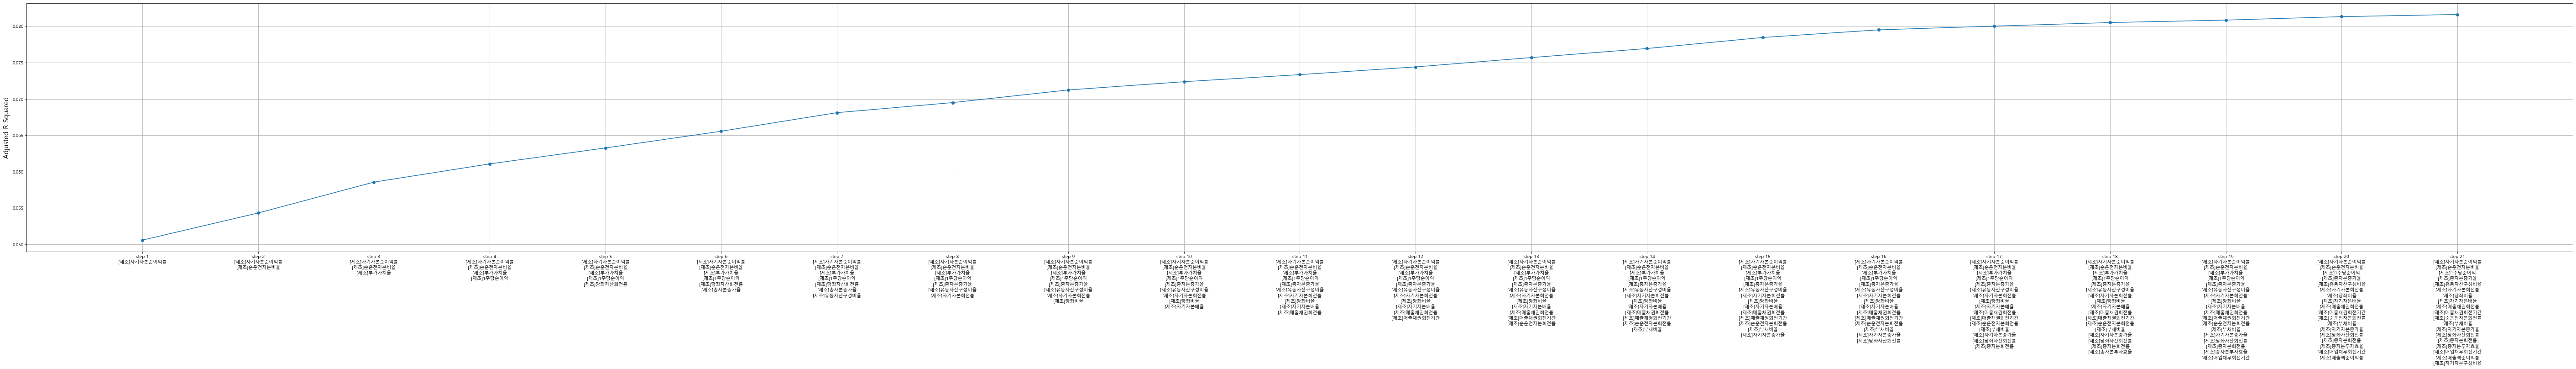

In [ ]:
def stepwise_feature_selection(feature, target, variables=feature.columns.tolist()):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    import pandas as pd
    warnings.filterwarnings("ignore")
    
    y = target ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = feature[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = feature[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(feature[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break
    
    model = sm.OLS(y, sm.add_constant(feature[selected_variables])).fit()
    print(model.summary())
    
    # 시각화
    fig = plt.figure(figsize=(100,100))
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
    plt.plot(steps,adjusted_r_squared, marker='o')
    plt.ylabel('Adjusted R Squared',fontsize=15)
    plt.grid(True)
    plt.show()

    return model

stepwise_model = stepwise_feature_selection(feature, target)

# 로지스틱 회귀분석 시행

## 회귀분석을 위한 다중공선성 측정

In [ ]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

print(vif(df_1))

    VIF Factor          features
0   125.720688          [제조]유동비율
1   115.904115          [제조]당좌비율
2    96.978834      [제조]순운전자본회전률
3    95.932940        [제조]총자본회전률
4    76.497482       [제조]유동자산회전률
5    72.048458      [제조]유동자산구성비율
6    53.982264      [제조]자기자본구성비율
7    42.300010       [제조]노동소득분배율
8    31.020326         [제조]비유동비율
9    30.201070         [제조]자본분배율
10   28.058706       [제조]당좌자산회전률
11   26.427042          [제조]부채비율
12   23.554191       [제조]자기자본회전률
13   20.873378       [제조]순운전자본비율
14   14.696298       [제조]총자본순이익률
15   14.435192         [제조]부가가치율
16   13.099139       [제조]총자본투자효율
17   12.307307         [제조]이윤분배율
18   11.386549       [제조]매출액순이익률
19    8.817343      [제조]비유동자산회전률
20    8.201329        [제조]총자본증가율
21    7.648285      [제조]자기자본순이익률
22    6.163961      [제조]매출채권회전기간
23    5.023073      [제조]재고자산회전기간
24    4.940381       [제조]유동자산증가율
25    4.854302      [제조]총자본사업이익률
26    4.049917      [제조]매입채무회전기간
27    3.747424        [제조]자기자본배율
28    3.584450          [제조]현금비율
29    3.53

## OLS 검정

In [ ]:
df_1f = df_1.drop(['label'],axis=1)

In [ ]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = df_1['label']
feature = df_1f

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')
# 상수항 더한 것 확인
# feature_add

In [ ]:
# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  label   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     20.68
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          6.94e-168
Time:                        16:17:42   Log-Likelihood:                 8043.9
No. Observations:               10485   AIC:                        -1.599e+04
Df Residuals:                   10436   BIC:                        -1.563e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0385      0.019     -2.017      0.044      -0.076      -0.001
[제조]매출액증가율        1.102e-05   3.01e-05      0.366      0.714    -4.8e-05       7e-05
[제조]유형자산증가율       1.254e-05   1.34e-05      0.933      0.351   -1.38e-05    3.89e-05
[제조]비유동자산증가율     -1.946e-05   3.73e-05     -0.522      0.602   -9.26e-05    5.36e-05
[제조]총자본증가율          -0.0004   8.93e-05     -4.438      0.000      -0.001      -0.000
[제조]자기자본증가율          0.0001   3.05e-05      3.958      0.000     6.1e-05       0.000
[제조]유동자산증가율       7.208e-05    4.9e-05      1.471      0.141   -2.39e-05       0.000
[제조]순이익증가율       -4.832e-07    6.3e-06     -0.077      0.939   -1.28e-05    1.19e-05
[제조]재고자산증가율      -2.939e-05   1.31e-05     -2.235      0.025   -5.52e-05   -3.61e-06
[제조]매출액총이익률       4.314e-05   7.12e-05      0.606      0.545   -9.65e-05       0.000
[제조]매출액순이익률         -0.0002   7.29e-05     -2.160      0.031      -0.000   -1.46e-05
[제조]총자본사업이익률         0.0003      0.000      1.395      0.163      -0.000       0.001
[제조]총자본순이익률         -0.0008      0.000     -2.378      0.017      -0.001      -0.000
[제조]자기자본순이익률        -0.0002      0.000     -1.929      0.054      -0.000    3.29e-06
[제조]1주당순이익        8.999e-06   1.53e-06      5.881      0.000       6e-06     1.2e-05
[제조]1주당매출액       -1.015e-07   9.58e-08     -1.060      0.289   -2.89e-07    8.63e-08
[제조]총자본회전률           0.0315      0.011      2.834      0.005       0.010       0.053
[제조]자기자본회전률         -0.0179      0.002     -7.660      0.000      -0.023      -0.013
[제조]비유동자산회전률         0.0009      0.001      0.942      0.346      -0.001       0.003
[제조]재고자산회전률       3.293e-06    4.1e-06      0.804      0.422   -4.74e-06    1.13e-05
[제조]매출채권회전률          0.0008      0.000      4.412      0.000       0.000       0.001
[제조]매입채무회전률      -1.391e-05   1.04e-05     -1.334      0.182   -3.44e-05    6.53e-06
[제조]매입채무회전기간         0.0001   5.39e-05      2.655      0.008    3.75e-05       0.000
[제조]재고자산회전기간     -4.086e-05   3.25e-05     -1.259      0.208      -0.000    2.28e-05
[제조]매출채권회전기간         0.0001   3.26e-05      3.356      0.001    4.55e-05       0.000
[제조]1회전기간            0.0151      0.037      0.408      0.683      -0.057       0.088
[제조]운전자본회전률          0.0020      0.003      0.785      0.432      -0.003       0.007
[제조]순운전자본회전률         0.0212      0.010      2.187      0.029       0.002       0.040
[제조]유동자산회전률         -0.0067      0.005     -1.406      0.160      -0.016       0.003
[제조]당좌자산회전률         -0.0030      0.002     -1.465      0.143      -0.007       0.001
[제조]유동비율          5.537e-05   2.68e-05      2.064      0.039    2.79e-06       0.000
[제조]당좌비율         -2.827e-05    2.9e-05     -0.975      0.330   -8.51e-05    2.86e-05
[제조]현금비율         -7.328e-06   1.55e-05     -0.474      0.636   -3.77e-05     2.3e-05
[제조]부채비율             0.

In [ ]:
def backward_regression(feature, target,
                           initial_list=[], 
                           threshold_out = 0.05):
    
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")
    
    feature_list = feature.columns.tolist()  
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature.columns.tolist() 
    
    while True:
        changed=False
        model = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        step += 1
        steps.append(step)        
        adj_r_squared = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())
        
        if not changed:
            break
    
    # 최종모델 출력
    model = sm.OLS(target, sm.add_constant(feature[included])).fit()
    print(model.summary())
    print(feature[included].columns)

    
    # fig = plt.figure(figsize=(10,10))
    # plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
    # plt.plot(steps, adj_r_squared_list, marker='o')
    # plt.ylabel('adj_r_squared',fontsize=15)
    # plt.grid(True)
    # plt.show()

    return model

backward_model = backward_regression(df_1f, df_1['label'])

                            OLS Regression Results                            
Dep. Variable:                  label   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     58.32
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          7.75e-159
Time:                        16:43:30   Log-Likelihood:                 7961.3
No. Observations:               10485   AIC:                        -1.589e+04
Df Residuals:                   10470   BIC:                        -1.578e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0059      0.005      1.234   

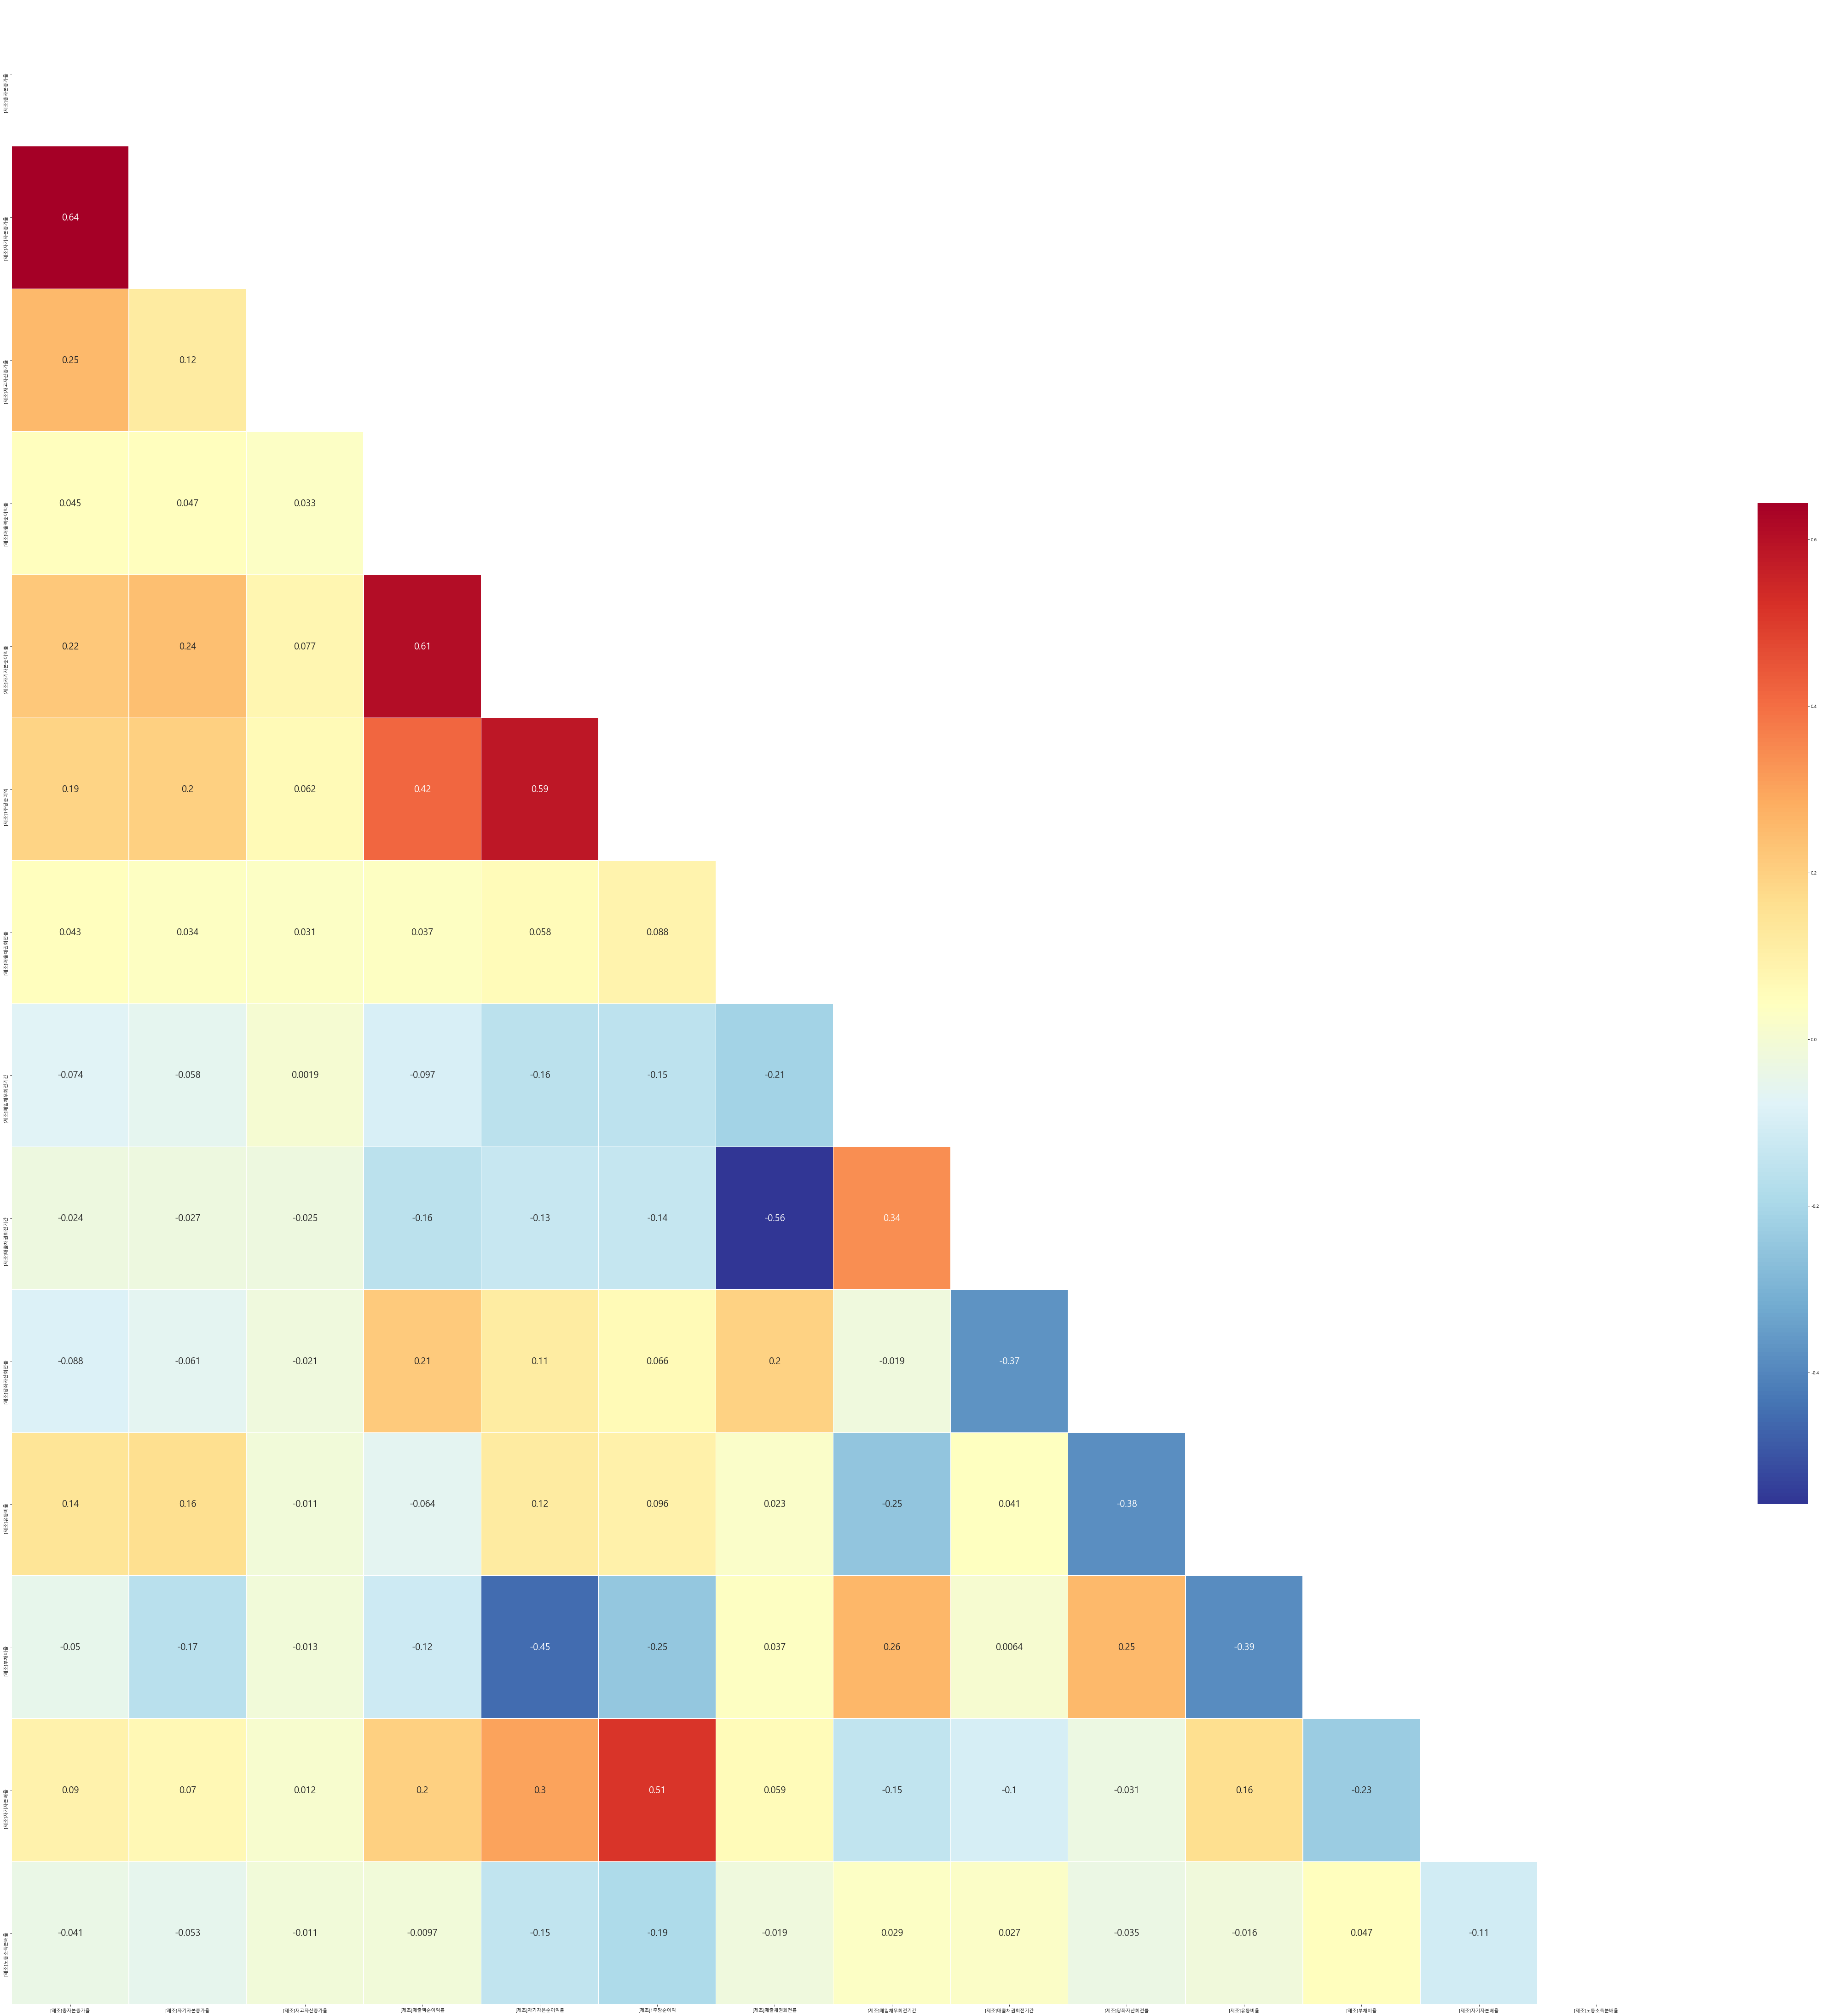

In [ ]:
# corr 시각화
def corr_heatmap(dataset, method_option = 'pearson'):

    
    # heatmap 그리기
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(80,80))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, 
                annot_kws={"size": 20}, linewidths=.5, mask=mask_ut)
    plt.show()

# 함수 사용
corr_heatmap(df_1[['[제조]총자본증가율', '[제조]자기자본증가율', '[제조]재고자산증가율', '[제조]매출액순이익률',
                '[제조]자기자본순이익률','[제조]1주당순이익','[제조]매출채권회전률', '[제조]매입채무회전기간', '[제조]매출채권회전기간', 
                '[제조]당좌자산회전률', '[제조]유동비율', '[제조]부채비율','[제조]자기자본배율','[제조]노동소득분배율']])

In [ ]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df_1[['[제조]총자본증가율', '[제조]자기자본증가율', '[제조]매출액순이익률', '[제조]자기자본순이익률',
       '[제조]1주당순이익', '[제조]자기자본회전률', '[제조]매출채권회전률', '[제조]매입채무회전기간',
       '[제조]매출채권회전기간', '[제조]유동비율', '[제조]부채비율', '[제조]순운전자본비율', '[제조]자기자본배율',
       '[제조]총자본투자효율']])

,VIF Factor,features
0,5.180203,[제조]부채비율
1,4.614002,[제조]자기자본회전률
2,4.528326,[제조]순운전자본비율
3,3.963077,[제조]총자본투자효율
4,3.942594,[제조]매출채권회전기간
5,3.520965,[제조]유동비율
6,3.159570,[제조]매입채무회전기간
7,3.073342,[제조]자기자본순이익률
8,2.551376,[제조]자기자본배율
9,2.175152,[제조]매출채권회전률
